## Tarea  4 Algoritmos de Aprendizaje no supervisado 

In [150]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  

In [79]:
import pandas as pd
# Cargar datos
datos = pd.read_csv('C:/UNAD/Mall_Customers.csv')

In [83]:
# Realizamos lectura de los Datos para el análisis exploratorio

datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [85]:
# Descripción de los datos
datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

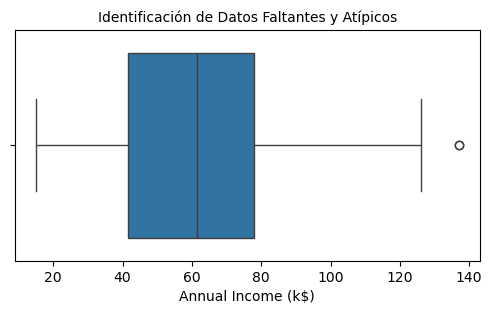

In [87]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  

In [89]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingreso Anual: ",datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuación de Gasto: ",datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingreso Anual:  0
Cantidad de Registros con cero en Puntuación de Gasto:  0


In [102]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

datos['Annual Income (k$)']=datos['Annual Income (k$)'].replace(0,datos['Annual Income (k$)'].mean())

In [104]:
columnas_a_reemplazar = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for columna in columnas_a_reemplazar:
    media = Datos[columna].mean()
    Datos[columna] = Datos[columna].replace(0, media)


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

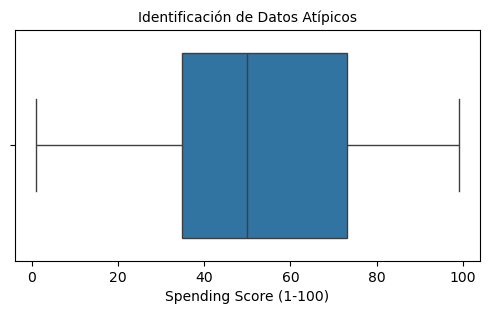

In [97]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [106]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((datos['Spending Score (1-100)']<nivel_minimo)|(datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [108]:
datos = datos[(datos['Spending Score (1-100)'] < nivel_maximo) & (datos['Spending Score (1-100)'] > nivel_minimo)]


In [110]:
#Revisión del tipo de datos y datos faltantes

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


 ## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

In [118]:
datos = datos[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [120]:
# Revisión de los datos de las variables objetivo

datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


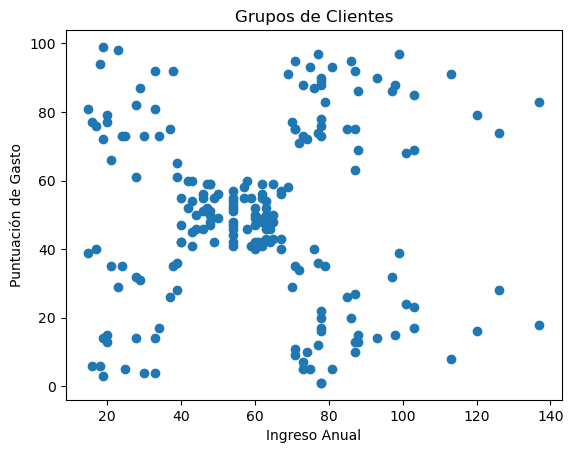

In [122]:
plt.scatter(datos['Annual Income (k$)'], datos['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.title('Grupos de Clientes')
plt.show()


## 4. Entrenar el modelo configurando los diferentes hiperparámetros.

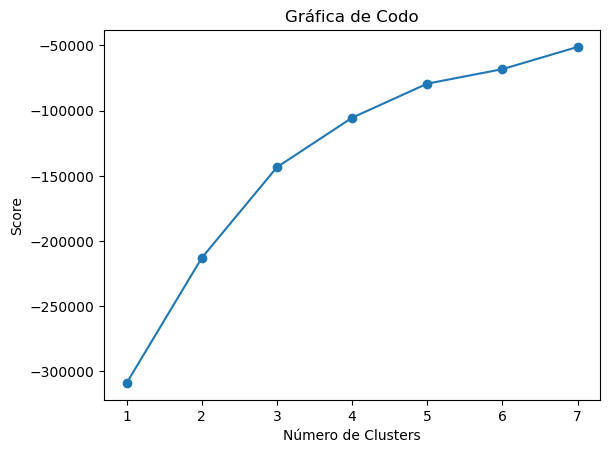

In [127]:
nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(datos).score(datos) for i in range(len(kmeans))]
score
plt.plot(nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()


In [131]:
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(datos)

KMeans(n_clusters=5, random_state=0)

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 

In [137]:
Modelo.labels_
datos["Grupo"] = Modelo.labels_ 
print (datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      2
2     20                  16                       6      0
3     23                  16                      77      2
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [139]:
Observaciones = len(datos)
X = datos.drop('Grupo', axis=1)
clusters = datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.3771108731967625 |
| Indice Calinski Harabasz | 133.49030043802063 |
|  Indice Davies Bouldin   | 0.9845471043038023 |
+--------------------------+--------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 

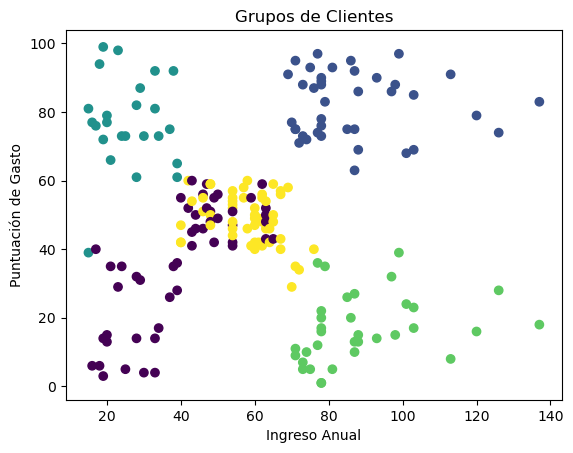

In [141]:
plt.scatter(datos['Annual Income (k$)'], datos['Spending Score (1-100)'], c=datos['Grupo'], cmap='viridis')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.title('Grupos de Clientes')
plt.show()


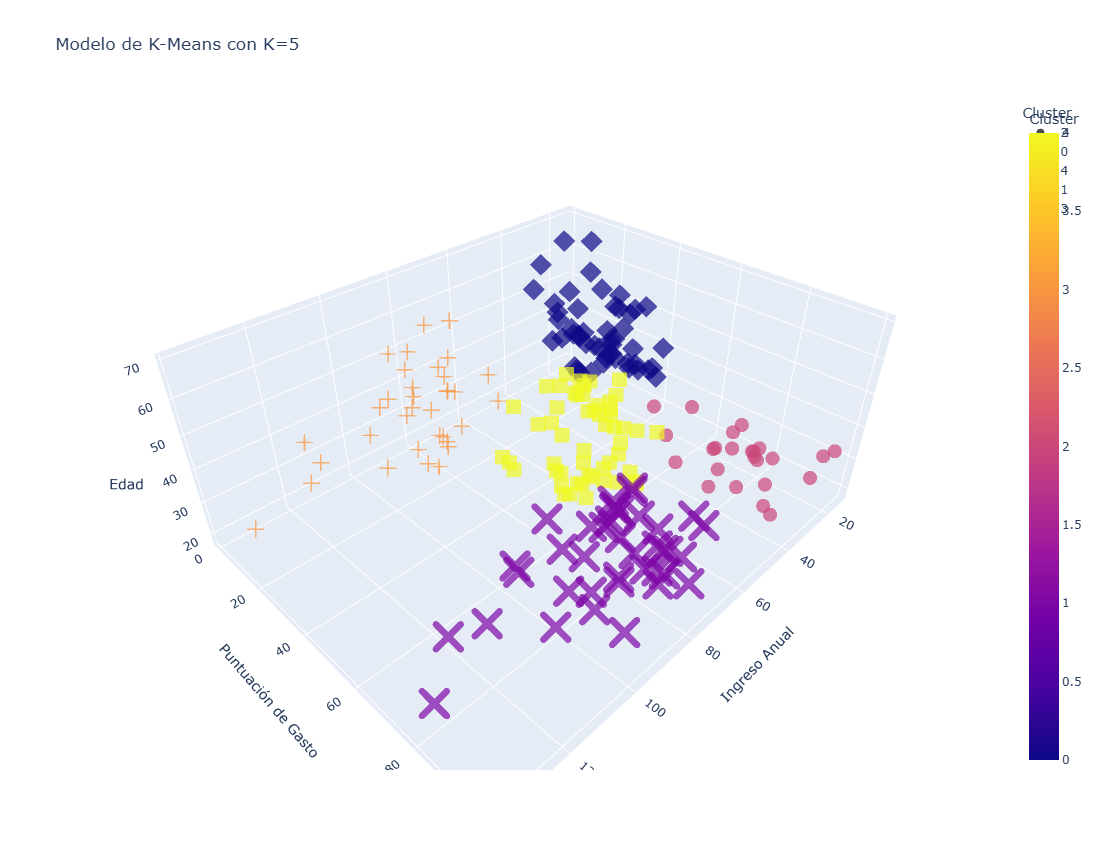

In [148]:
import plotly.express as px

# Gráfico interactivo en 3D con Plotly
Grafica_3D = px.scatter_3d(
    datos,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    z='Age',
    color='Grupo',
    symbol='Grupo',
    opacity=0.7,
    width=900,
    height=850,
    title='Modelo de K-Means con K=5',
    labels={'Annual Income (k$)': 'Ingreso Anual', 
            'Spending Score (1-100)': 'Puntuación de Gasto', 
            'Age': 'Edad', 
            'Grupo': 'Cluster'}
)

# Opcional: quitar la leyenda si no quieres mostrarla
Grafica_3D.update_layout(showlegend=True)  # Puedes poner False si no quieres la leyenda

# Mostrar la gráfica
Grafica_3D.show()


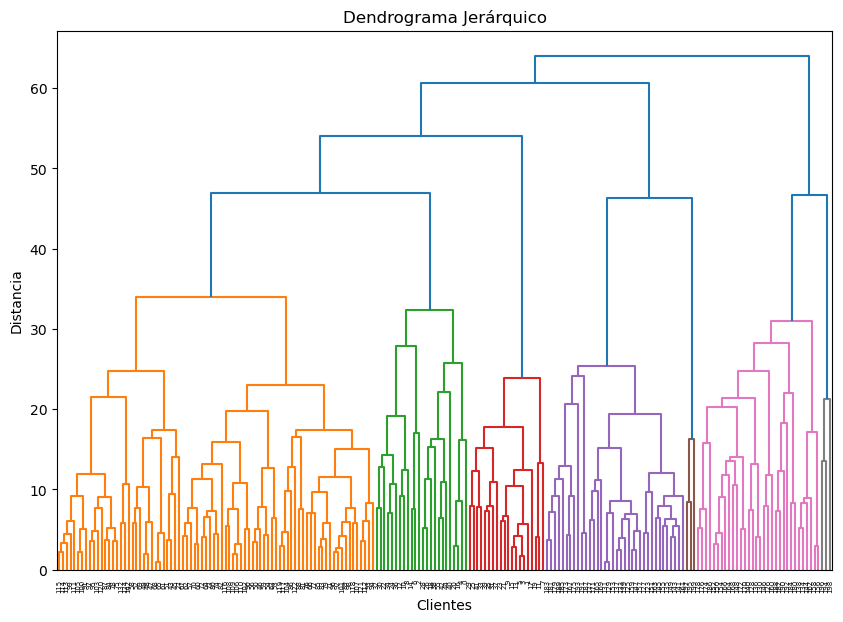


--- MÉTRICAS DE EVALUACIÓN ---
Coeficiente de Silueta: 0.4104
Índice de Davies-Bouldin: 0.8330
Índice de Calinski-Harabasz: 124.3019


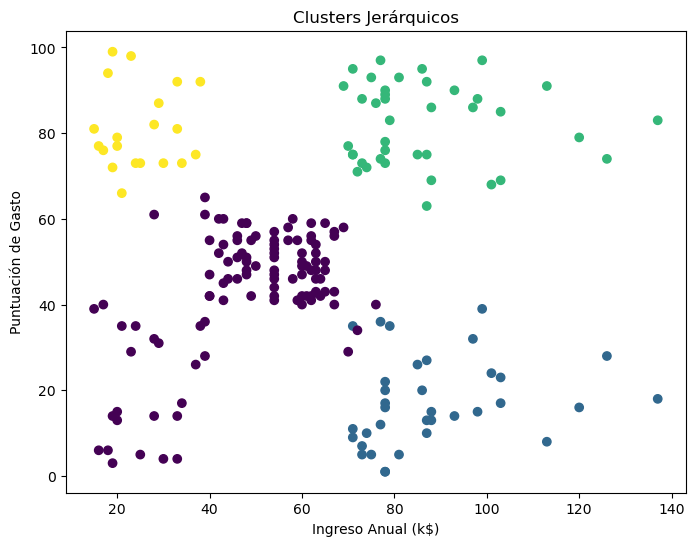

In [173]:
# 1. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 2. Cargar datos
datos = pd.read_csv('C:/UNAD/Mall_Customers.csv')

# 3. Seleccionar características numéricas para clustering
x = datos[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# 4. Crear el dendrograma para determinar número de clusters
linked = linkage(x, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending', 
           show_leaf_counts=True)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

# 5. Aplicar el modelo de clustering jerárquico
modelo_hc = AgglomerativeClustering(n_clusters=4, linkage='average')
modelo_hc.fit(x)

# 6. Agregar etiquetas al DataFrame
datos['Cluster_HC'] = modelo_hc.labels_

# 7. Evaluar el desempeño del modelo
silhouette_avg = silhouette_score(x, modelo_hc.labels_)
davies_bouldin = davies_bouldin_score(x, modelo_hc.labels_)
calinski_harabasz = calinski_harabasz_score(x, modelo_hc.labels_)

print("\n--- MÉTRICAS DE EVALUACIÓN ---")
print(f"Coeficiente de Silueta: {silhouette_avg:.4f}")
print(f"Índice de Davies-Bouldin: {davies_bouldin:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.4f}")

# 8. (Opcional) Visualización 2D
plt.figure(figsize=(8, 6))
plt.scatter(x["Annual Income (k$)"], x["Spending Score (1-100)"], c=datos['Cluster_HC'], cmap='viridis')
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntuación de Gasto")
plt.title("Clusters Jerárquicos")
plt.show()


## 7. Interpretar, analizar y documentar los resultados obtenidos. 